# Exploratory Structural Equation Modeling {#sec-cfa-esem}

::: {.chapterintro data-latex=""}
L'*Exploratory Structural Equation Modeling* (ESEM) è un framework analitico che integra i modelli di misurazione dell'Analisi Fattoriale Esplorativa (EFA) con il più strutturato approccio della Confirmatory Factor Analysis (CFA). Questa integrazione permette di godere dei benefici tipici della CFA, come la specificità e la rigore, pur mantenendo la flessibilità dell'EFA, che considera le saturazioni incrociate tra i fattori.

Inoltre, lo sviluppo della rotazione target nell'ESEM facilita la definizione a priori dei principali carichi fattoriali, mentre consente che i carichi incrociati rimangano il più possibile vicini a zero, ma siano stimati in maniera libera. Questa tecnica di rotazione consente di applicare il modello in modo confermativo, basandosi su una struttura fattoriale predefinita, pur adottando una flessibilità tipica dell'EFA. In questo modo, l'ESEM si presta sia a usi confermativi che esplorativi, combinando i vantaggi di entrambi gli approcci — EFA e CFA — in un unico modello comprensivo.
:::

**Prerequisiti**

**Concetti e Competenze Chiave**

**Preparazione del Notebook**

In [1]:
here::here("code", "_common.R") |>
    source()

# Load packages
if (!requireNamespace("pacman")) install.packages("pacman")
pacman::p_load(lavaan, psych, BifactorIndicesCalculator, semPlot, semTools)

## Introduzione

Nel modello di misurazione di Confirmatory Factor Analysis (CFA), comunemente adottato nella ricerca psicologica, solitamente sappiamo quali indicatori appartengono a ciascun fattore latente, una struttura denominata "a priori". Questo approccio è utilizzato per verificare se la struttura fattoriale presunta corrisponde effettivamente ai dati raccolti.

Tuttavia, nonostante la popolarità della CFA, essa presenta delle limitazioni significative. I modelli CFA spesso risultano eccessivamente semplici e restrittivi, presupponendo "fattori puri", cioè assumento che ciascun item saturi solamente sui suoi fattori latenti predeterminati, con saturazioni incrociate (ovvero, contributi di un item a fattori non primari) vincolate a zero. Questa restrizione può non riflettere adeguatamente la realtà di molte misure psicologiche, dove gli item tendono a riflettere più di un costrutto. Questo approccio può portare a una rappresentazione artificiale delle relazioni tra gli item e i fattori, risultando in statistiche di adattamento del modello sovrastimate e correlazioni tra fattori positivamente distorte. Studi di simulazione hanno mostrato che anche piccole saturazioni incrociate, se ignorate, possono portare ad una distorsione nelle stime dei parametri.

Un altro problema è rappresentato dagli indici di bontà di adattamento utilizzati nei modelli CFA, che sono spesso troppo restrittivi per strumenti psicologici multifattoriali, rendendo quasi impossibile ottenere un "buon" adattamento senza significative modifiche ai modelli. Tuttavia, quando analizzati a livello di item e per affidabilità, i modelli che non mostrano un buon adattamento possono comunque indicare saturazioni ragionevoli e alti livelli di affidabilità.

In risposta a queste sfide, sono stati sviluppati approcci più flessibili e robusti, come l'*Exploratory Structural Equation Modeling* (ESEM).

## Exploratory Structural Equation Modeling

L'ESEM combina elementi delle CFA e dell'Exploratory Factor Analysis (EFA) all'interno del tradizionale framework delle Equazioni Strutturali (SEM). Questo approccio rappresenta un compromesso tra la ricerca iterativa di soluzioni fattoriali ottimali, tipica dell'EFA, e la modellazione teorica restrittiva delle CFA. 

L'ESEM è essenzialmente un metodo confermativo che permette anche un'esplorazione attraverso l'uso di rotazioni mirate, mantenendo la presenza di caricamenti incrociati, seppur minimizzati. All'interno dell'ESEM, il ricercatore può prevedere a priori una struttura fattoriale, similmente a quanto avviene nelle CFA, ma con una maggiore flessibilità permessa dalla possibilità di modellare saturazioni incrociate.

Nell'ESEM, i fattori generali e specifici devono essere specificati come totalmente indipendenti, e le rotazioni ortogonali sono comuni nei modelli bifattoriali. I metodi di rotazione più usati nell'ESEM includono le rotazioni geomin e target, con rotazioni ortogonali adatte ai modelli più complessi.

Le analisi di simulazione indicano che le correlazioni tra i fattori latenti ottenute con l'ESEM sono generalmente meno distorte e più vicine alle vere associazioni, rendendo i modelli ESEM più coerenti con le teorie sottostanti e le intenzioni degli strumenti psicometrici misurati. 

Quando un modello ESEM include solo una parte di misurazione, viene definito come "analisi fattoriale esplorativa" o EFA. Se il modello include anche una parte strutturale, come regressioni tra variabili latenti, è classificato come "modello di equazioni strutturali esplorativo" o ESEM.

## Un Esempio Pratico

In questo esempio pratico analizzeremo nuovamente i dati di @brown2015confirmatory, ovvero otto misure di personalità raccolte su un campione di 250 pazienti che hanno concluso un programma di psicoterapia. Utilizzeremo un'analisi EFA mediante la funzione `efa()` di `lavaan`.  

Gli item sono i seguenti:

- anxiety (N1), 
- hostility (N2), 
- depression (N3), 
- self-consciousness (N4), 
- warmth (E1), 
- gregariousness (E2), 
- assertiveness (E3), 
- positive emotions (E4). 

In [2]:
varnames <- c("N1", "N2", "N3", "N4", "E1", "E2", "E3", "E4")
sds <- "5.7  5.6  6.4  5.7  6.0  6.2  5.7  5.6"

cors <- "
 1.000
 0.767  1.000
 0.731  0.709  1.000
 0.778  0.738  0.762  1.000
-0.351  -0.302  -0.356  -0.318  1.000
-0.316  -0.280  -0.300  -0.267  0.675  1.000
-0.296  -0.289  -0.297  -0.296  0.634  0.651  1.000
-0.282  -0.254  -0.292  -0.245  0.534  0.593  0.566  1.000"

psychot_cor_mat <- getCov(cors, names = varnames)
n <- 250

Definiamo un modello ad un solo fattore comune.

In [3]:
# 1-factor model
f1 <- '
    efa("efa")*f1 =~ N1 + N2 + N3 + N4 + E1 + E2 + E3 + E4
'

Definiamo un modello con due fattori comuni.

In [4]:
# 2-factor model
f2 <- '
    efa("efa")*f1 +
    efa("efa")*f2 =~ N1 + N2 + N3 + N4 + E1 + E2 + E3 + E4
'

Adattiamo ai dati il modello ad un fattore comune.

In [5]:
efa_f1 <-cfa(
    model = f1,
    sample.cov = psychot_cor_mat,
    sample.nobs = 250,
    rotation = "oblimin"
)

Esaminiamo la soluzione ottenuta.

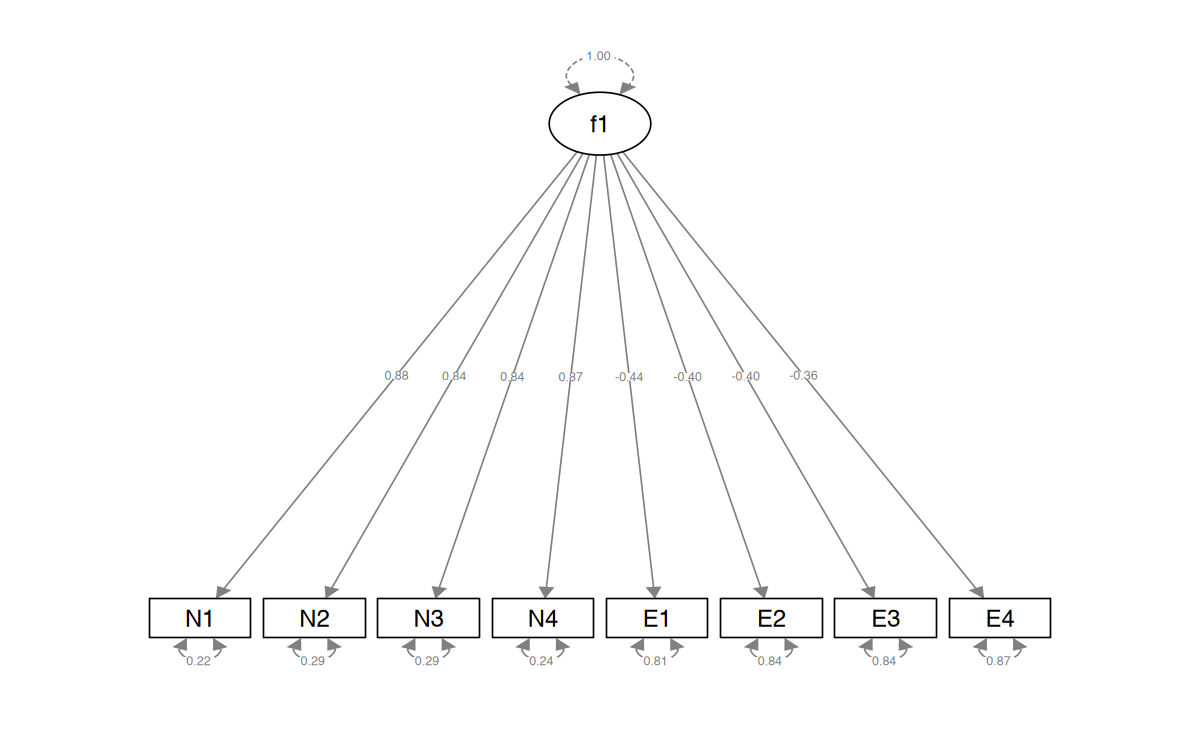

In [6]:
semPlot::semPaths(efa_f1,
    what = "col", 
    whatLabels = "std", 
    style = "mx",
    layout = "tree2", 
    nCharNodes = 7,
    shapeMan = "rectangle", 
    sizeMan = 8, 
    sizeMan2 = 5
)

In [ ]:
summary(
    efa_f1,
    fit.measures = TRUE,
    standardized = TRUE,
    rsquare = TRUE
) |> 
    print()

lavaan 0.6-19 ended normally after 2 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        16

  Rotation method                      OBLIMIN OBLIQUE
  Oblimin gamma                                      0
  Rotation algorithm (rstarts)                GPA (30)
  Standardized metric                             TRUE
  Row weights                                     None

  Number of observations                           250

Model Test User Model:
                                                      
  Test statistic                               375.327
  Degrees of freedom                                20
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                              1253.791
  Degrees of freedom                                28
  P-value                                        0.000

User Model vers

In [8]:
standardizedSolution(efa_f1) |> print()

   lhs op rhs est.std    se     z pvalue ci.lower ci.upper
1   f1 =~  N1   0.880 0.018 48.29      0    0.845    0.916
2   f1 =~  N2   0.842 0.022 38.61      0    0.800    0.885
3   f1 =~  N3   0.843 0.022 38.76      0    0.800    0.886
4   f1 =~  N4   0.872 0.019 45.88      0    0.835    0.909
5   f1 =~  E1  -0.439 0.054 -8.18      0   -0.544   -0.334
6   f1 =~  E2  -0.398 0.056 -7.14      0   -0.508   -0.289
7   f1 =~  E3  -0.399 0.056 -7.16      0   -0.508   -0.290
8   f1 =~  E4  -0.364 0.057 -6.35      0   -0.477   -0.252
9   N1 ~~  N1   0.225 0.032  7.01      0    0.162    0.288
10  N2 ~~  N2   0.290 0.037  7.90      0    0.218    0.362
11  N3 ~~  N3   0.289 0.037  7.88      0    0.217    0.361
12  N4 ~~  N4   0.240 0.033  7.23      0    0.175    0.305
13  E1 ~~  E1   0.807 0.047 17.14      0    0.715    0.900
14  E2 ~~  E2   0.841 0.044 18.93      0    0.754    0.928
15  E3 ~~  E3   0.841 0.045 18.89      0    0.753    0.928
16  E4 ~~  E4   0.867 0.042 20.72      0    0.785    0.9

In [9]:
lavaan::residuals(efa_f1, type = "cor") |> print()

$type
[1] "cor.bollen"

$cov
       N1     N2     N3     N4     E1     E2     E3     E4
N1  0.000                                                 
N2  0.025  0.000                                          
N3 -0.011 -0.001  0.000                                   
N4  0.010  0.003  0.027  0.000                            
E1  0.035  0.068  0.014  0.065  0.000                     
E2  0.035  0.056  0.036  0.080  0.500  0.000              
E3  0.055  0.047  0.040  0.052  0.459  0.492  0.000       
E4  0.039  0.053  0.015  0.073  0.374  0.448  0.421  0.000



Adattiamo ai dati il modello a due fattori comuni.

In [10]:
efa_f2 <- cfa(
    model = f2,
    sample.cov = psychot_cor_mat,
    sample.nobs = 250,
    rotation = "oblimin"
)

Esaminiamo la soluzione ottenuta.

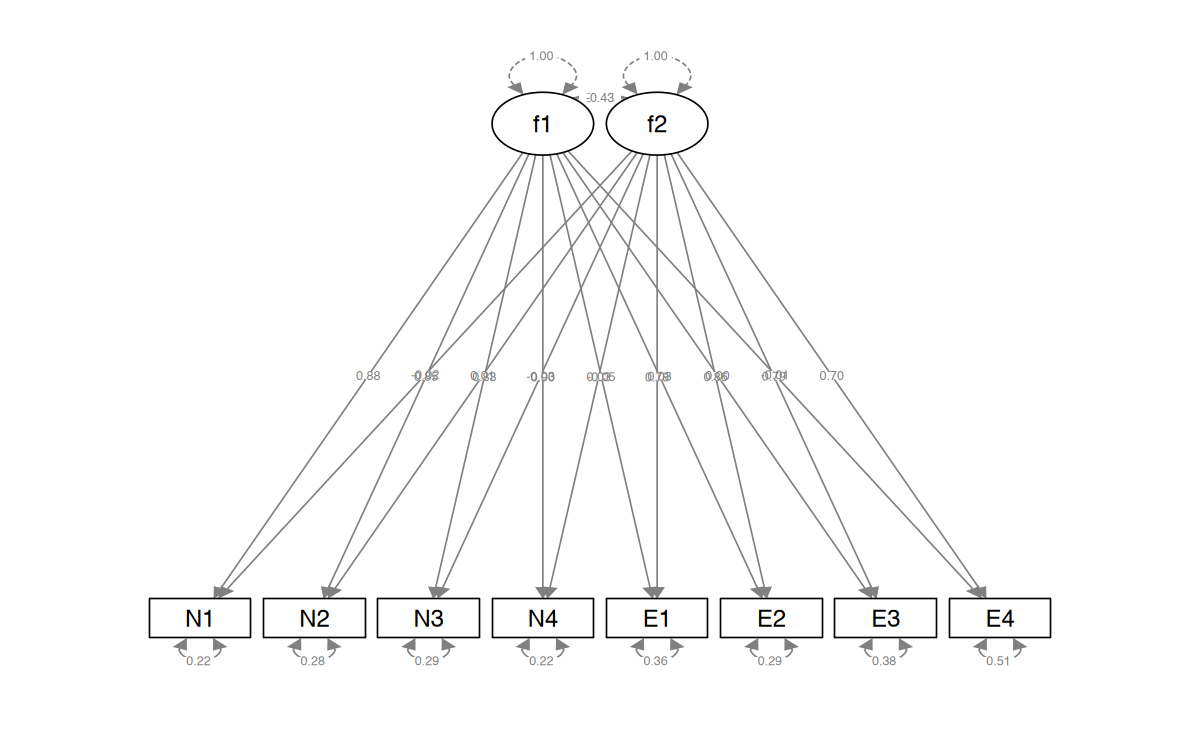

In [11]:
semPlot::semPaths(efa_f2,
    what = "col", 
    whatLabels = "std", 
    style = "mx",
    layout = "tree2", 
    nCharNodes = 7,
    shapeMan = "rectangle", 
    sizeMan = 8, 
    sizeMan2 = 5
)

In [12]:
summary(
    efa_f2,
    fit.measures = TRUE,
    standardized = TRUE,
    rsquare = TRUE
) |> print()

lavaan 0.6-19 ended normally after 1 iteration

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        25
  Row rank of the constraints matrix                 2

  Rotation method                      OBLIMIN OBLIQUE
  Oblimin gamma                                      0
  Rotation algorithm (rstarts)                GPA (30)
  Standardized metric                             TRUE
  Row weights                                     None

  Number of observations                           250

Model Test User Model:
                                                      
  Test statistic                                 9.811
  Degrees of freedom                                13
  P-value (Chi-square)                           0.709

Model Test Baseline Model:

  Test statistic                              1253.791
  Degrees of freedom                                28
  P-value        

In [13]:
standardizedSolution(efa_f2) |> print()

   lhs op rhs est.std    se      z pvalue ci.lower ci.upper
1   f1 =~  N1   0.876 0.024 36.440  0.000    0.829    0.923
2   f1 =~  N2   0.853 0.027 31.403  0.000    0.800    0.906
3   f1 =~  N3   0.828 0.028 29.069  0.000    0.772    0.884
4   f1 =~  N4   0.898 0.023 38.383  0.000    0.852    0.944
5   f1 =~  E1  -0.046 0.040 -1.139  0.255   -0.125    0.033
6   f1 =~  E2   0.035 0.034  1.031  0.303   -0.031    0.101
7   f1 =~  E3   0.000 0.040  0.010  0.992   -0.078    0.079
8   f1 =~  E4  -0.006 0.049 -0.131  0.896   -0.103    0.090
9   f2 =~  N1  -0.017 0.032 -0.539  0.590   -0.079    0.045
10  f2 =~  N2   0.011 0.035  0.322  0.748   -0.058    0.080
11  f2 =~  N3  -0.035 0.037 -0.949  0.343   -0.106    0.037
12  f2 =~  N4   0.031 0.031  0.994  0.320   -0.030    0.092
13  f2 =~  E1   0.778 0.038 20.654  0.000    0.704    0.852
14  f2 =~  E2   0.855 0.033 26.036  0.000    0.791    0.920
15  f2 =~  E3   0.787 0.038 20.886  0.000    0.713    0.861
16  f2 =~  E4   0.697 0.046 15.282  0.00

Anche se abbiamo introdotto finora soltanto la misura di bontà di adattamento del chi-quadrato, aggiungiamo qui il calcolo di altre misure di bontà di adattamento che discuteremo in seguito.

In [14]:
fit_measures_robust <- c(
    "chisq", "df", "pvalue", "cfi", "rmsea", "srmr"
)

Confrontiamo le misure di bontà di adattamento del modello che ipotizza un solo fattore comune e il modello che ipotizza la presenza di due fattori comuni.

In [18]:
# collect them for each model
rbind(
    fitmeasures(efa_f1, fit_measures_robust),
    fitmeasures(efa_f2, fit_measures_robust)
) |>
    # wrangle
    data.frame() |>
    mutate(
        chisq = round(chisq, digits = 0),
        df = as.integer(df),
        pvalue = ifelse(pvalue == 0, "< .001", pvalue)
    ) |>
    mutate_at(vars(cfi:srmr), ~ round(., digits = 3)) |>
    print()

  chisq df            pvalue  cfi rmsea  srmr
1   375 20            < .001 0.71 0.267 0.187
2    10 13 0.709310449320098 1.00 0.000 0.010


In [16]:
lavaan::residuals(efa_f2, type = "cor") |> print()

$type
[1] "cor.bollen"

$cov
       N1     N2     N3     N4     E1     E2     E3     E4
N1  0.000                                                 
N2  0.018  0.000                                          
N3 -0.014 -0.006  0.000                                   
N4 -0.003 -0.013  0.017  0.000                            
E1 -0.003  0.015 -0.012  0.000  0.000                     
E2 -0.009 -0.004  0.006  0.007  0.006  0.000              
E3  0.015 -0.008  0.011 -0.016  0.006 -0.010  0.000       
E4 -0.001  0.000 -0.013  0.009 -0.024  0.006  0.016  0.000



L'evidenza empirica supporta la superiorità del modello a due fattori rispetto a quello ad un solo fattore comune. In particolare, l'analisi fattoriale esplorativa svolta mediante la funzione `efa()` evidenzia la capacità del modello a due fattori di fornire una descrizione adeguata della struttura dei dati e di distinguere in modo sensato tra i due fattori ipotizzati.

## Riflessioni Conclusive

L'ESEM rappresenta un ponte significativo tra i modelli di misurazione tradizionali dell'Exploratory Factor Analysis (EFA) e il più esteso quadro del Confirmatory Factor Analysis/Structural Equation Modeling (CFA/SEM). Grazie a questo, l'ESEM combina i benefici dell'EFA con quelli del CFA/SEM, fornendo un approccio più flessibile e inclusivo nell'analisi dei dati. Tale integrazione ha segnato un progresso notevole nella ricerca statistica, evidenziando l'importanza dell'EFA che precedentemente era sottovalutata.

L'ESEM e il quadro bifattoriale-ESEM, in particolare, offrono una rappresentazione più fedele e precisa della multidimensionalità dei costrutti psicometrici, che è spesso presente nelle misurazioni. Questo approccio riconosce e gestisce meglio la natura multidimensionale dei costrutti, a differenza dell'approccio tradizionale del CFA, che tende a sovrastimare le correlazioni tra i fattori quando non considera adeguatamente la loro natura gerarchica e interconnessa (Asparouhov et al., 2015; Morin et al., 2020).

Nonostante questi vantaggi, l'ESEM presenta alcune limitazioni che devono essere considerate:

1. **Complessità Computazionale**: L'ESEM può essere più complesso e richiedere maggiori risorse computazionali rispetto agli approcci tradizionali, soprattutto quando si gestiscono grandi set di dati o modelli con molti fattori.
2. **Interpretazione dei Risultati**: A causa della sua flessibilità, l'ESEM può produrre risultati che sono più difficili da interpretare. Ad esempio, la sovrapposizione tra i fattori può complicare l'interpretazione dei costrutti.
3. **Rischio di Overfitting**: La maggiore flessibilità dell'ESEM può anche portare a un rischio maggiore di overfitting, specialmente in campioni più piccoli o con modelli eccessivamente complessi.
4. **Necessità di Esperienza e Conoscenza**: Per utilizzare efficacemente l'ESEM, è richiesta una comprensione approfondita della teoria sottostante e delle tecniche statistiche, che può essere una barriera per alcuni ricercatori.

Nonostante queste limitazioni, si prevede che i futuri sviluppi e le applicazioni dell'ESEM conducano a soluzioni più integrate e a un consenso più ampio sulle migliori pratiche nell'utilizzo di questo potente strumento statistico. Nel @sec-esem-sem esploreremo il set-ESEM, una recente evoluzione di questa metodologia.

## Session Info

In [17]:
sessionInfo()

R version 4.4.2 (2024-10-31)
Platform: aarch64-apple-darwin20
Running under: macOS Sequoia 15.1.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.12.0

locale:
[1] C

time zone: Europe/Rome
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] BifactorIndicesCalculator_0.2.2 MASS_7.3-61                    
 [3] viridis_0.6.5                   viridisLite_0.4.2              
 [5] ggpubr_0.6.0                    ggExtra_0.10.1                 
 [7] gridExtra_2.3                   patchwork_1.3.0                
 [9] bayesplot_1.11.1                semTools_0.5-6                 
[11] semPlot_1.1.6                   lavaan_0.6-19                  
[13] psych_2.4.6.26                  scales_1.3.0                   
